# Requirements

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [39]:
data = pd.read_csv("data/user_behavior_data.csv")
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            630 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    float64
 8   Age                         665 non-null    float64
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 60.3+ KB


In [41]:
data.isnull().sum()

User ID                         0
Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

<Axes: >

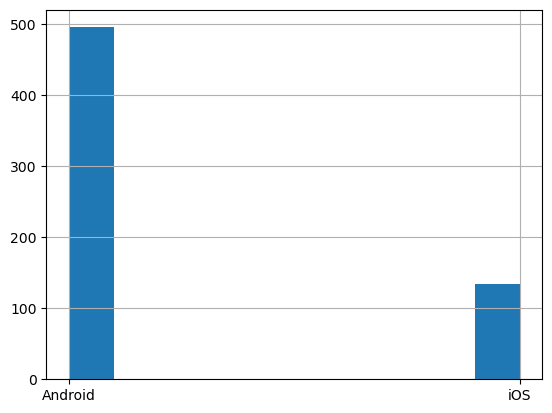

In [42]:
data['Operating System'].hist()

In [43]:
data['Operating System'].unique()

array(['Android', 'iOS', nan], dtype=object)

In [44]:
# frequent_imputer = SimpleImputer(strategy = 'most_frequent')
# data['Operating System'] = data['Operating System'].astype(str)
# data['Operating System'] = frequent_imputer.fit_transform(data['Operating System'].values.reshape(1, -1))[0]

constant_imputer = SimpleImputer(strategy = 'constant', fill_value = data['Operating System'].value_counts().idxmax())
data['Operating System'] = constant_imputer.fit_transform([data['Operating System']])[0]

In [45]:
data['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [46]:
data.isnull().sum()

User ID                         0
Device Model                    0
Operating System                0
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

Preprocess the input and the output variables appropriately.

In [47]:
encoder = LabelEncoder()
for column in data.columns:
    if type(data[column].to_list()[0]) == str:
         data[column] = encoder.fit_transform(data[column])

In [48]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122.0,40.0,1,4
1,2,1,0,268,4.7,1331,42,944.0,47.0,0,3
2,3,3,0,154,4.0,761,32,NaN,42.0,1,2
3,4,0,0,239,4.8,1676,56,871.0,20.0,1,3
4,5,4,1,187,4.3,1367,58,988.0,31.0,0,3


Explore the dataset using visualizations of your choice.

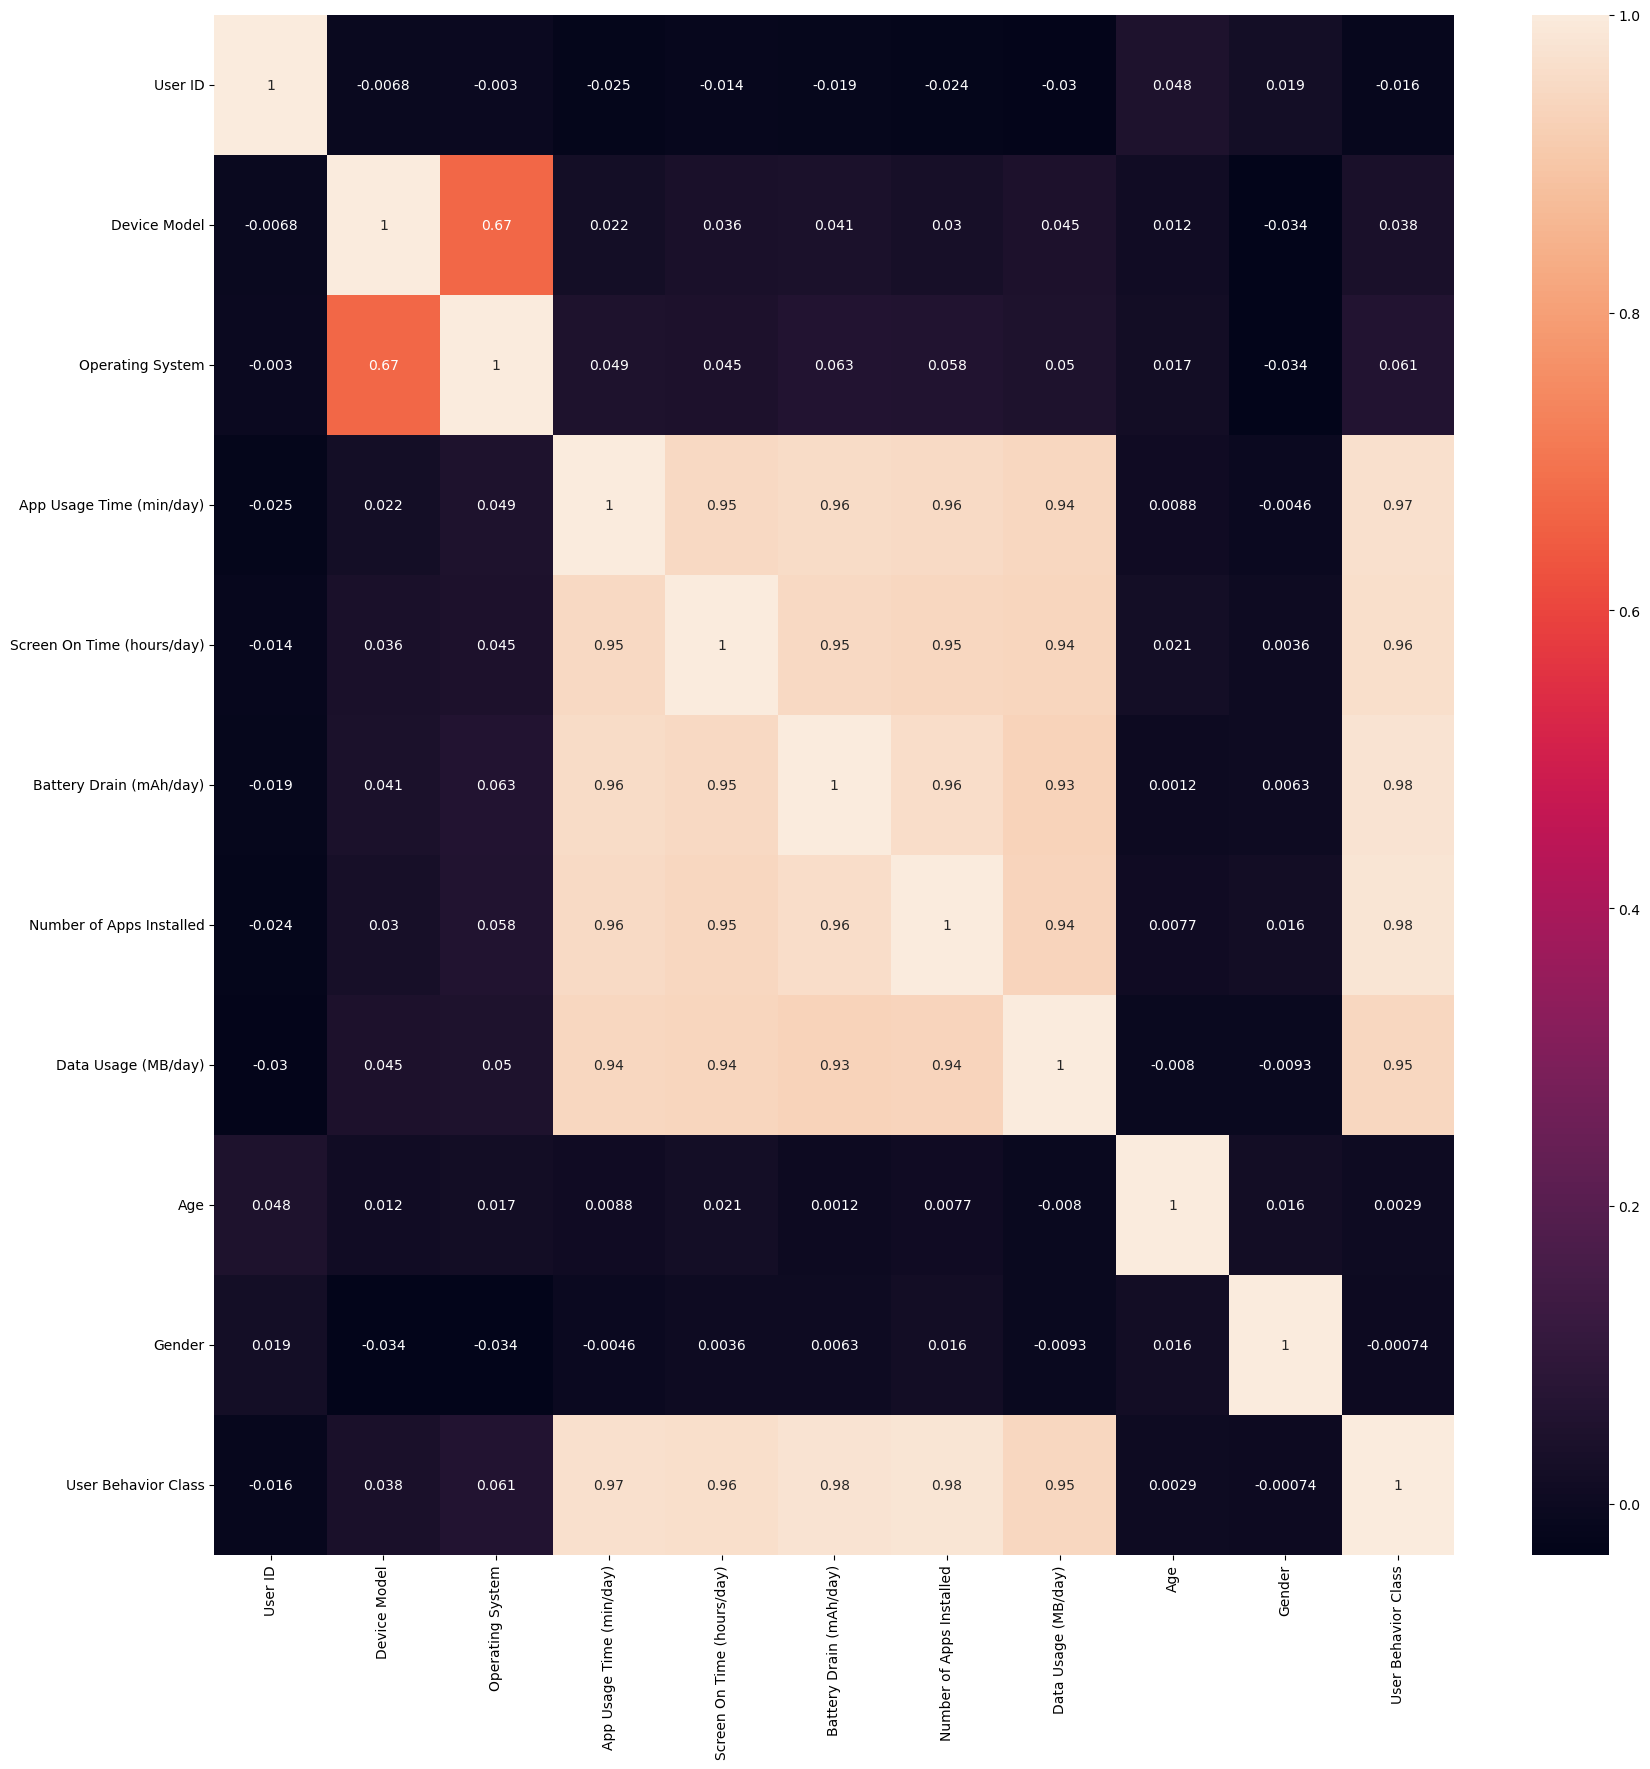

In [49]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Device Model'}>,
        <Axes: title={'center': 'Operating System'}>],
       [<Axes: title={'center': 'App Usage Time (min/day)'}>,
        <Axes: title={'center': 'Screen On Time (hours/day)'}>,
        <Axes: title={'center': 'Battery Drain (mAh/day)'}>],
       [<Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage (MB/day)'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'User Behavior Class'}>, <Axes: >]],
      dtype=object)

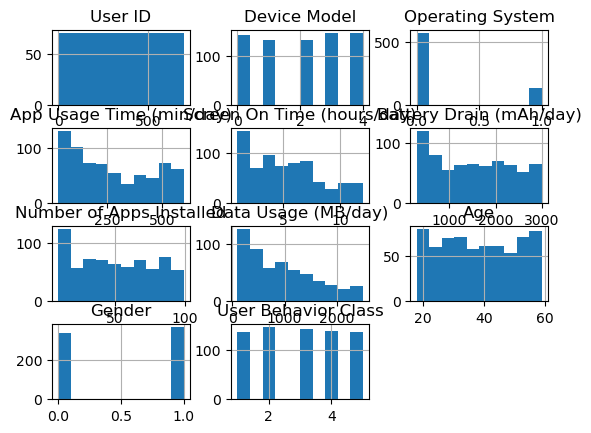

In [52]:
data.hist()

Check if the dataset is balanced.

In [8]:
b = data['User Behavior Class'].value_counts() / len(data) * 100
b = b.reset_index()
b

,User Behavior Class,count
0,2,20.857143
1,3,20.428571
2,4,19.857143
3,5,19.428571
4,1,19.428571


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [53]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,User ID,0.0
1,Device Model,0.0
2,Operating System,0.0
3,App Usage Time (min/day),0.0
4,Screen On Time (hours/day),0.0
5,Battery Drain (mAh/day),0.0
6,Number of Apps Installed,0.0
7,Data Usage (MB/day),20.0
8,Age,5.0
9,Gender,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

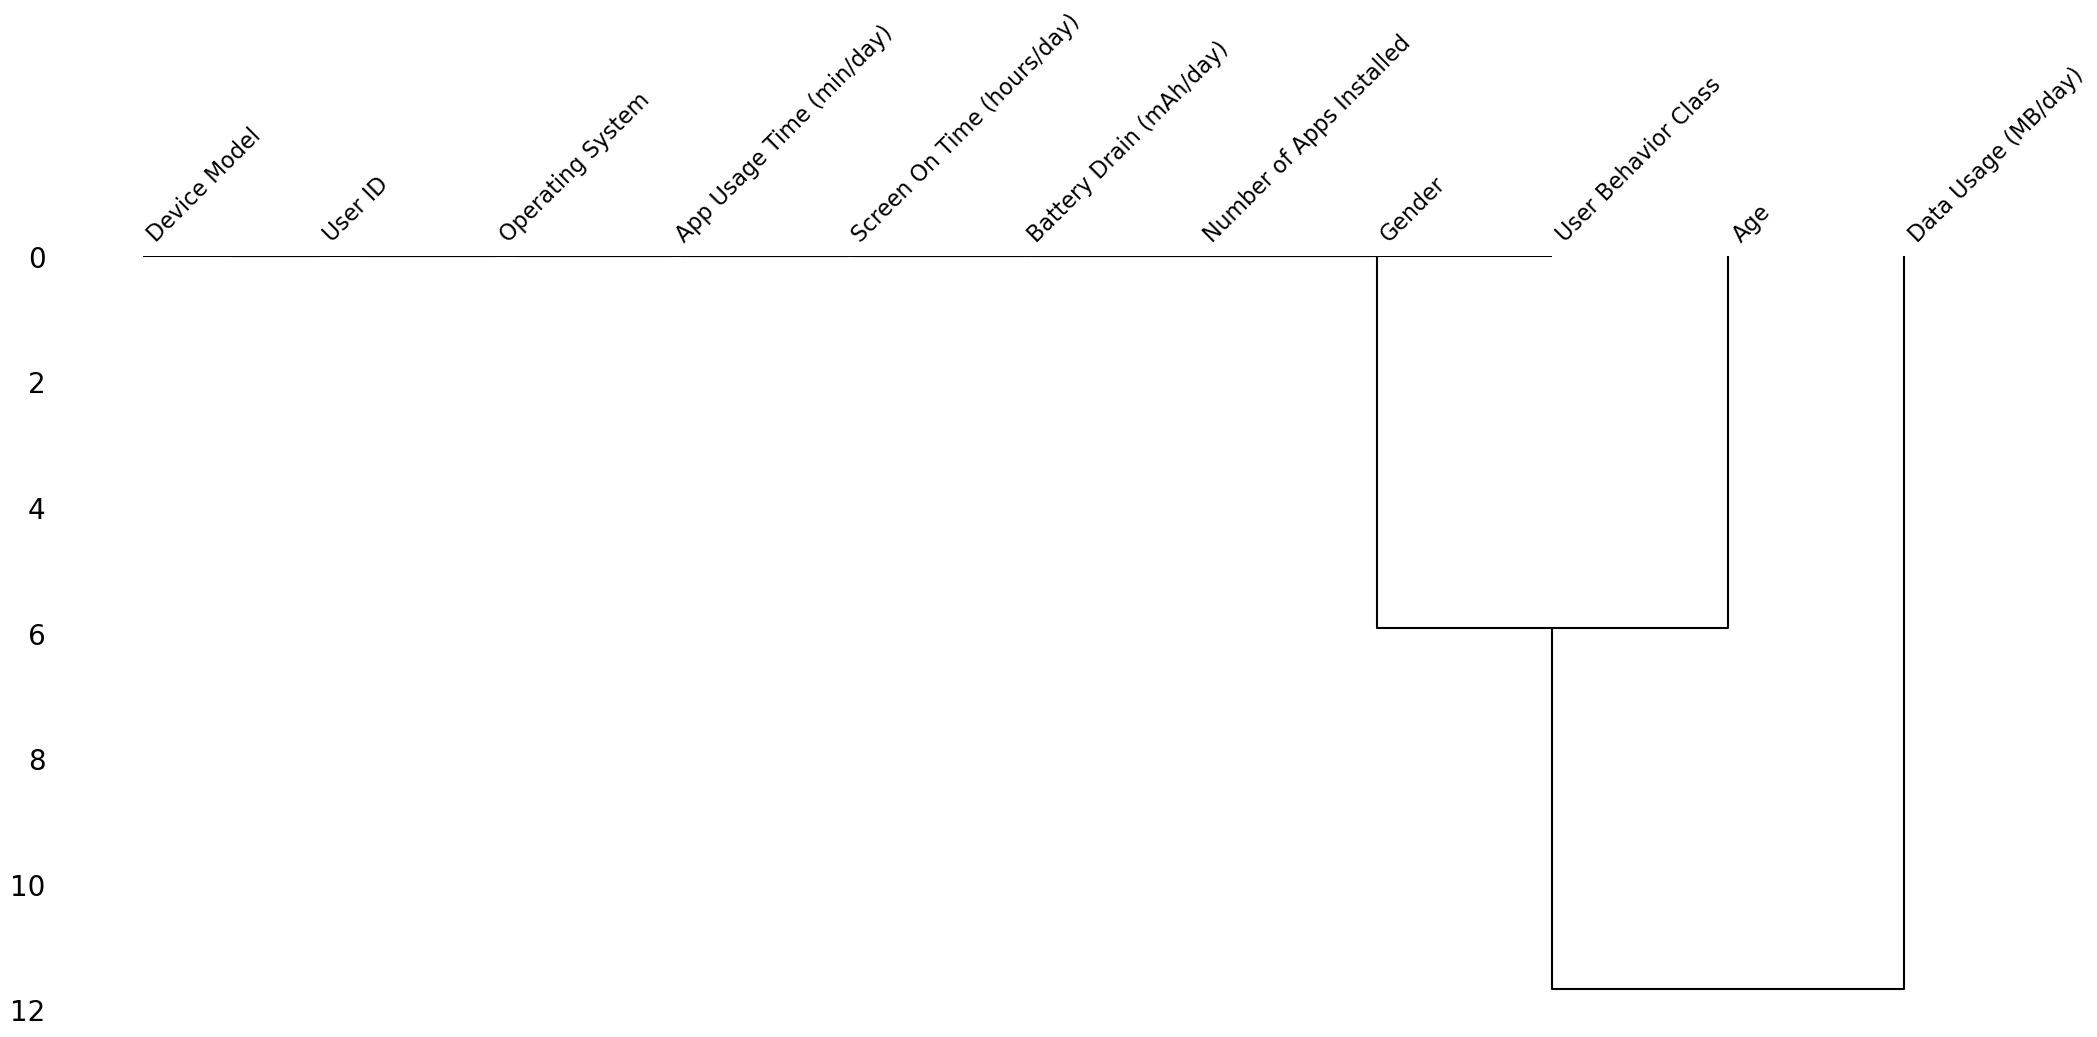

In [55]:
msno.dendrogram(data)
plt.show()

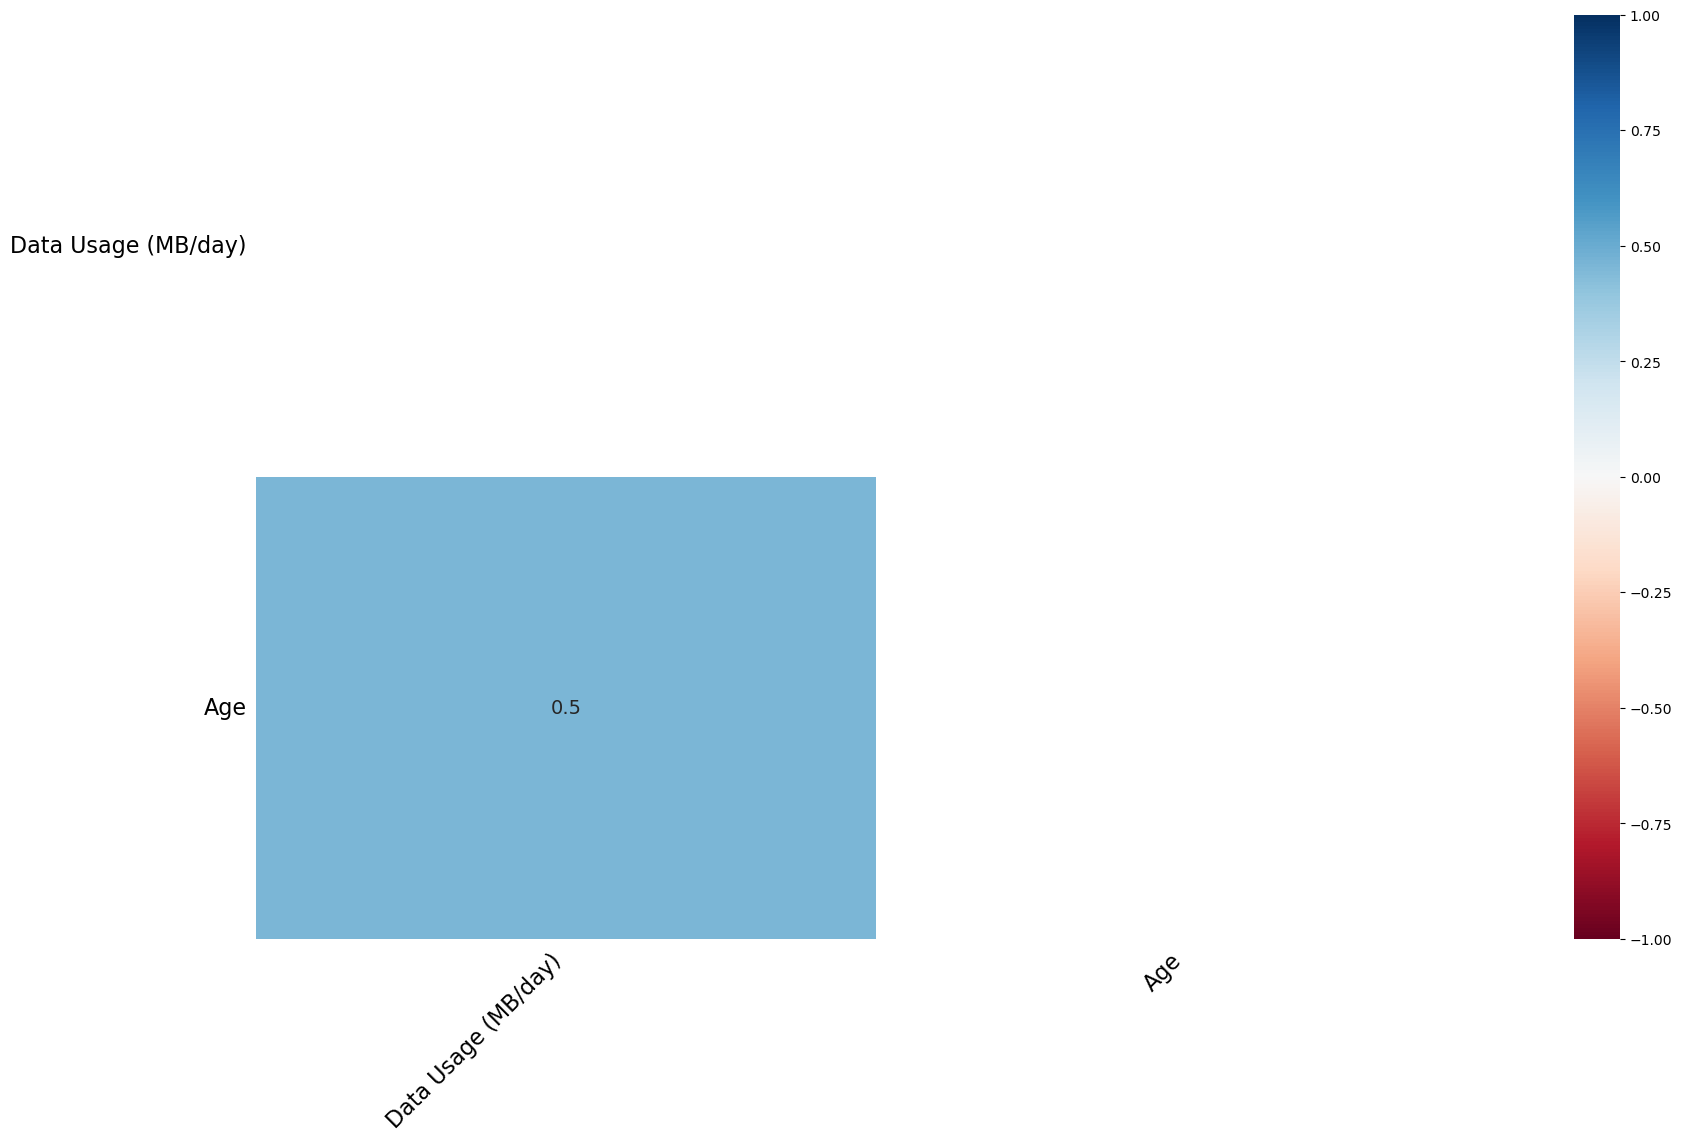

In [56]:
msno.heatmap(data)
plt.show()

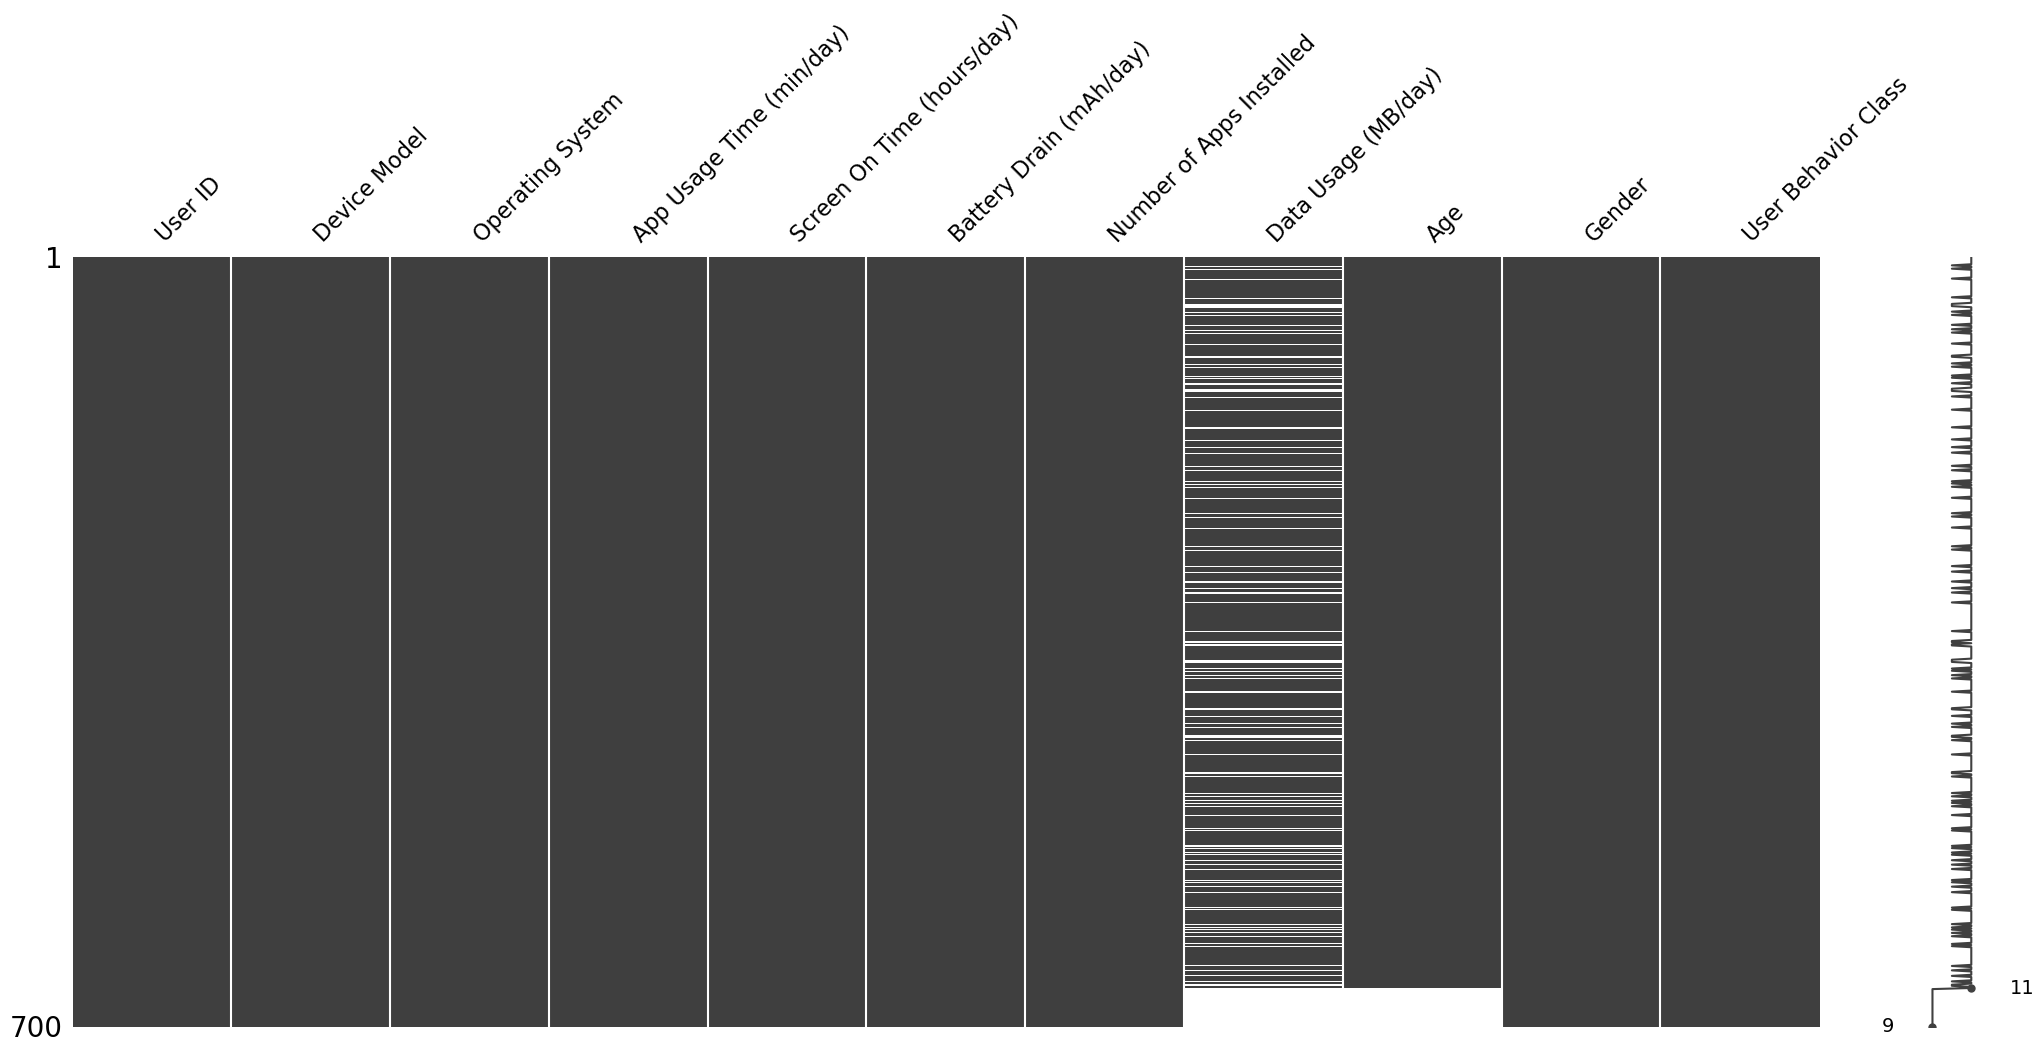

In [57]:
msno.matrix(data.sort_values('Age'))
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice = IterativeImputer()
imputed_values = mice.fit_transform(data[['Data Usage (MB/day)', 'App Usage Time (min/day)', 'Screen On Time (hours/day)','Number of Apps Installed']])
data[['Data Usage (MB/day)', 'App Usage Time (min/day)', 'Screen On Time (hours/day)','Number of Apps Installed']] = imputed_values

In [59]:
data.isnull().sum()

User ID                        0
Device Model                   0
Operating System               0
App Usage Time (min/day)       0
Screen On Time (hours/day)     0
Battery Drain (mAh/day)        0
Number of Apps Installed       0
Data Usage (MB/day)            0
Age                           35
Gender                         0
User Behavior Class            0
dtype: int64

In [60]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Data Usage (MB/day)']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
print(imputed_data)
imputed_data = scaler.inverse_transform(imputed_data)
print(imputed_data)

[[0.53658537 0.42659975]
 [0.70731707 0.35215391]
 [0.58536585 0.19710234]
 ...
 [0.7804878  0.14847344]
 [0.63414634 0.05102468]
 [0.12195122 0.30363864]]
[[  40.         1122.        ]
 [  47.          944.        ]
 [  42.          573.27170169]
 ...
 [  50.          457.        ]
 [  44.          224.        ]
 [  23.          828.        ]]


In [61]:
data[['Age', 'Data Usage (MB/day)']] = imputed_data

In [62]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [64]:
target = 'User Behavior Class'
X = data.drop([target],axis=1)
Y= data[target]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [75]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [76]:
model.fit(X_train,y_train)

GaussianNB()

Use the trained model to make predictions for the test set.

In [77]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [78]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
1.0
[[24  0  0  0  0]
 [ 0 28  0  0  0]
 [ 0  0 31  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 26]]
